In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import font_manager

font_dirs = ['//Users/oscarb/Downloads/aptos-font', ]  # The directory containing your font file
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Aptos'
# plt.rcParams['font.serif'] = ['Palatino']
plt.rcParams['font.size'] = 9 

In [2]:
import pandas as pd
import json

# Define a list of file paths to your JSON data
json_file_paths = [
    'not_similar_time_series_data.table.json',
    'similiar_time_series_data.table.json'
]

# Create an empty list to store DataFrames
dataframes = []

# Loop through each JSON file path
for json_file_path in json_file_paths:
    # Load the JSON data from the file
    with open(json_file_path, 'r') as json_file:
        json_data = json.load(json_file)

    # Extract the 'data' and 'columns' from the JSON data
    data = json_data.get('data', [])
    columns = json_data.get('columns', [])

    # Create a Pandas DataFrame for the current JSON file
    df = pd.DataFrame(data, columns=columns)

    # Append the DataFrame to the list
    dataframes.append(df)

# Now, 'dataframes' is a list containing DataFrames for each JSON file
# You can access each DataFrame by its index, for example, dataframes[0] is the first DataFrame


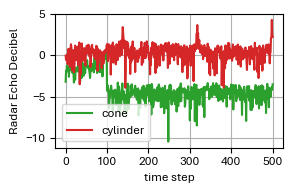

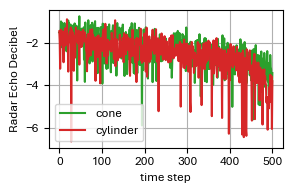

In [4]:

import seaborn as sns
# Define a function to create a plot for each class
def plot_data_by_class(data, title):
    plt.figure(figsize=(3, 2))

    # Get unique class names from the 'Class' column
    unique_classes = data['label'].unique()

    # Define a color map for different classes
    default_colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
    default_colors = sns.color_palette("tab10")
    default_colors[1], default_colors[3] = default_colors[3], default_colors[1]
    default_colors[0], default_colors[2] = default_colors[2], default_colors[0] 
    
    for i, class_name in enumerate(unique_classes):
        class_data = data[data['label'] == class_name]
        plt.plot(class_data['time_step'], class_data['signal [dB]'], label=f'{class_name}', color=default_colors[i])

    # plt.title(title)
    plt.xlabel('time step')
    plt.ylabel('Radar Echo Decibel')
    plt.legend()
    plt.grid(True)
    # Adjusting plot aesthetics
    plt.tight_layout()
    plt.savefig(f'/Users/oscarb/Downloads/2{title}.pdf', format='pdf')
    plt.show()
    # Plot each dataset

plot_data_by_class(dataframes[0], 'tight_Not_Similar_Time_Series')
plot_data_by_class(dataframes[1], 'tight_Similar_Time_Series')
